# Shafiqul Alam Khan

# EE 5323 Digital Image Processing

# Homework #4

# Due date: 2/24/2023

## 1. Apply the Mixed Filtered process using the Sobel operator and generate the eight images of the lena-gray image from HW3.

In [1]:
# Importing libraries
import cv2
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from PIL import Image
import PIL.ImageOps    
import argparse
import math
import scipy.ndimage
import imageio as iio
import matplotlib.image as mpimg

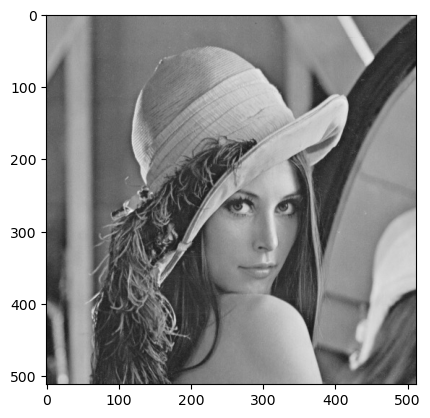

In [2]:
# Importing "cell020004.jpg" image
s1 = Image.open('lena_gray.jpg')

# Printing imported image
plt.imshow(s1)
plt.show()

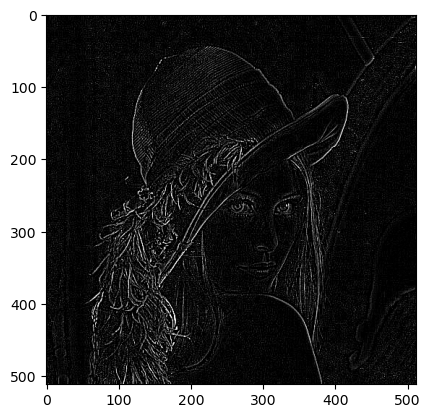

In [3]:
# Sharpening original image
img = cv2.imread('lena_gray.jpg', 1)

# Preparing kernel for sharpening filter
kernel = np.array([[-1, -1, -1],
                 [-1, 8, -1],
                 [-1, -1, -1]])

# Applying sharpening filter
s2 = cv2.filter2D(img, -1, kernel)

# Showing sharpened image
plt.imshow(s2)
plt.show()

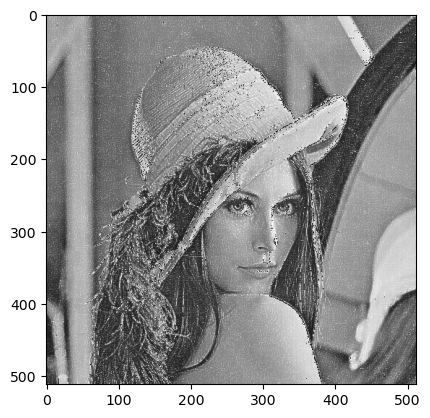

In [4]:
# adding images
s3 = s1 + s2

cv2.imwrite(r's3.png', s3)
s3 = cv2.imread('s3.png', 1)

# Shwing added image
plt.imshow(s3)
plt.show()

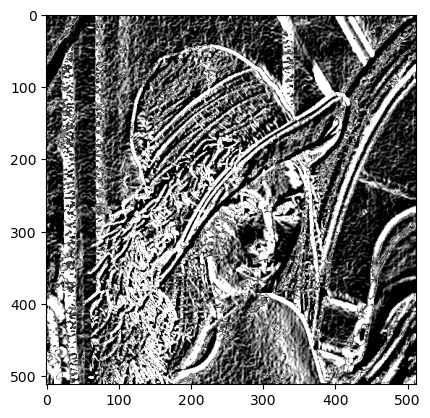

In [5]:
# sobel filtering
img = cv2.imread('lena_gray.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gaussian = cv2.GaussianBlur(gray,(3,3),0)

#sobel
img_sobelx = cv2.Sobel(img_gaussian,cv2.CV_8U,1,0,ksize=5)
img_sobely = cv2.Sobel(img_gaussian,cv2.CV_8U,0,1,ksize=5)
s4 = img_sobelx + img_sobely

# Showing sobel filtered image
plt.imshow(s4, 'gray')
plt.show()

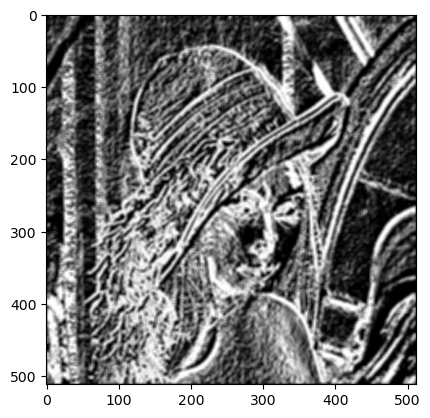

In [6]:
# Adding ones to image
ones = np.ones((5,5))/25

# Lowpass filter
s5 = scipy.ndimage.correlate(s4, ones, mode='constant')

cv2.imwrite(r's5.png', s5)
s5 = cv2.imread('s5.png', 1)

# Showing added image
plt.imshow(s5)
plt.show()

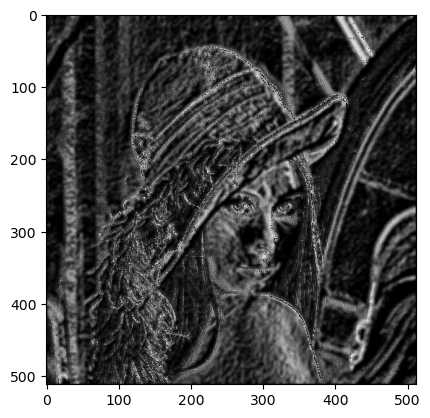

In [7]:
# Multipling images
mul_1 = np.double(s3)/255
mul_2 = np.double(s5)/255
s6 = np.array((mul_1*mul_2)*255, dtype = 'uint8')

# Showing resulting image
plt.imshow(s6)
plt.show()

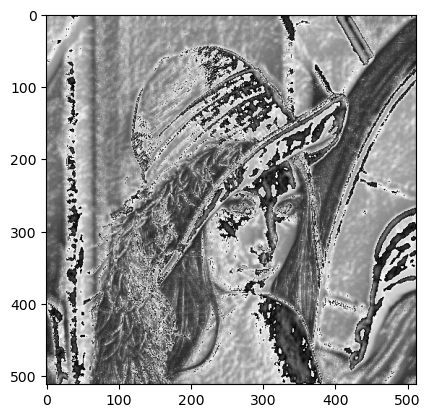

In [8]:
# Adding S1 and S6
s7 = s1 + s6

# Showing added image
plt.imshow(s7)
plt.show()

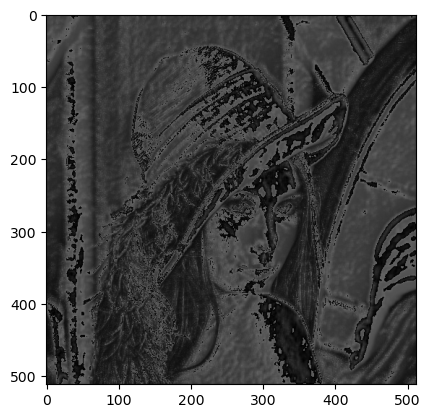

In [9]:
# Normalizing image
img_normalized = cv2.normalize(s7, None, 0, 0.4, cv2.NORM_MINMAX, dtype=cv2.CV_32F)

# Showing normalized image
plt.imshow(img_normalized)
plt.show()

img_normalized = np.asarray(img_normalized)

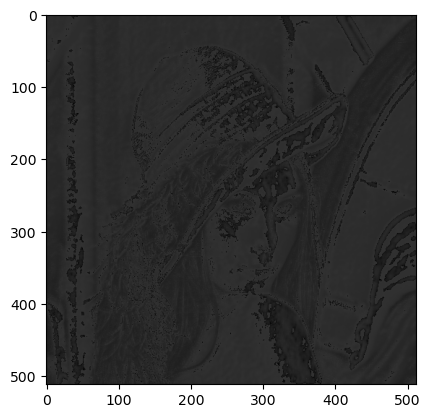

In [10]:
# Gamma correction

gamma = 0.25

s8 = np.array(255*(img_normalized / 255) ** gamma, dtype = 'uint8')

# Showing gamma corrected image 
plt.imshow(s8)
plt.show()

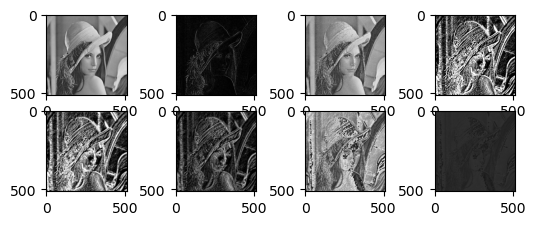

In [11]:
# Showing all the images together
plt.subplot(4, 4, 1)
plt.imshow(s1)
plt.subplot(4, 4, 2)
plt.imshow(s2)
plt.subplot(4, 4, 3)
plt.imshow(s3)
plt.subplot(4, 4, 4)
plt.imshow(s4, 'gray')
plt.subplot(4, 4, 5)
plt.imshow(s5)
plt.subplot(4, 4, 6)
plt.imshow(s6)
plt.subplot(4, 4, 7)
plt.imshow(s7)
plt.subplot(4, 4, 8)
plt.imshow(s8)
plt.show()